In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Pre Trained Model**

In [ ]:
IMAGE_SHAPE = (224, 224)  #Shape of images in the dataset

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
from google.colab import files
uploaded =files.upload()

Saving ImageNetLabels.txt to ImageNetLabels.txt


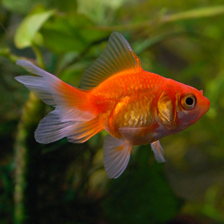

In [ ]:
import io 
gold_fish = Image.open(io.BytesIO(uploaded['goldfish.jpg'])).resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [ ]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

**Loading Flowers Dataset**

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228818944/228813984 [==============================] - 4s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/14646281372_5f13794b47.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9825716455_f12bcc8d4e_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20621698991_dcb323911d.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4664737020_b4c61aacd3_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15243175532_ac28c48e14_m.jpg')]

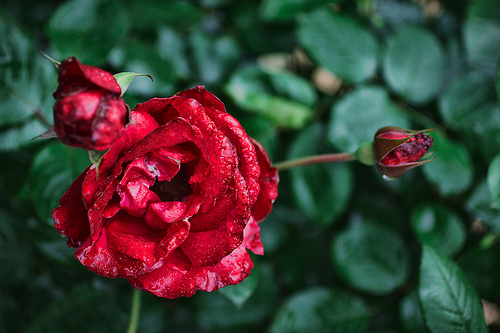

In [ ]:
roses = list(data_dir.glob('roses/*'))
Image.open(str(roses[0]))

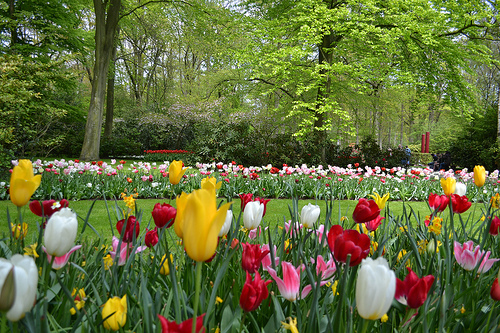

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[1]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/8125886145_ae99f91fd0.jpg'),
 PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8667746487_781af9e615_n.jpg'),
 PosixPath('datasets/flower_photos/roses/13231224664_4af5293a37.jpg'),
 PosixPath('datasets/flower_photos/roses/9159362388_c6f4cf3812_n.jpg')]

In [ ]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/8125886145_ae99f91fd0.jpg')

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/8125886145_ae99f91fd0.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[12, 24,  6],
        [11, 22,  6],
        [11, 22,  6],
        ...,
        [27, 47, 18],
        [28, 46, 17],
        [27, 45, 16]],

       [[13, 24,  8],
        [12, 23,  7],
        [13, 23,  7],
        ...,
        [28, 49, 16],
        [29, 47, 16],
        [28, 46, 17]],

       [[16, 26, 10],
        [15, 25,  9],
        [14, 24,  8],
        ...,
        [29, 50, 17],
        [29, 47, 16],
        [28, 46, 17]],

       ...,

       [[27, 31, 19],
        [27, 31, 19],
        [25, 29, 17],
        ...,
        [ 5, 14,  4],
        [ 5, 14,  4],
        [ 5, 14,  4]],

       [[26, 31, 16],
        [27, 32, 17],
        [25, 30, 15],
        ...,
        [ 5, 14,  4],
        [ 5, 14,  4],
        [ 5, 15,  3]],

       [[26, 31, 16],
        [28, 33, 18],
        [26, 31, 16],
        ...,
        [ 6, 15,  5],
        [ 5, 15,  3],
        [ 5, 15,  3]]], dtype=uint8)

In [ ]:
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img,(244,244)).shape

(244, 244, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
type(X)

list

In [ ]:
#Converting Lists to Np.Array
X =np.array(X)
y =np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#Preprocessing Scaling Images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Make Predictions using pretrained Model on flowers dataset**

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
X.shape

(3670, 224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

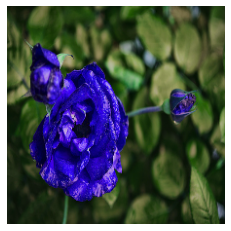

In [ ]:
plt.axis('off')
plt.imshow(X[0])

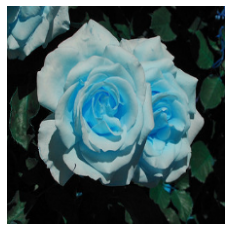

In [ ]:
plt.axis('off')
plt.imshow(X[1])

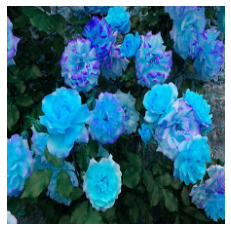

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([722, 722, 795])

In [ ]:
x =[image_labels[i] for i in predicted]
x

['pillow', 'pillow', 'shower curtain']

**Now useing Pretrained model and retraining with flowers Dataset**

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False) 

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])



In [ ]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 98s 1s/step - loss: 1.2762 - acc: 0.5056
Epoch 2/5
86/86 [==============================] - 94s 1s/step - loss: 0.4437 - acc: 0.8488
Epoch 3/5
86/86 [==============================] - 93s 1s/step - loss: 0.3283 - acc: 0.8942
Epoch 4/5
86/86 [==============================] - 94s 1s/step - loss: 0.2881 - acc: 0.9079
Epoch 5/5
86/86 [==============================] - 94s 1s/step - loss: 0.2327 - acc: 0.9313


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 32s 1s/step - loss: 0.3517 - acc: 0.8813


[0.3517220914363861, 0.8812636137008667]

In [ ]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 31s 1s/step - loss: 2.4679 - acc: 0.1928


[2.467880964279175, 0.19281046092510223]